# K-Formal Concept Analysis (K-FCA) Tutorial

This notebook provides an interactive introduction to K-valued Formal Concept Analysis.

## What is K-FCA?

K-FCA generalizes classical Formal Concept Analysis to handle:
- **Continuous data** (real-valued attributes)
- **Multi-valued data** (degrees of membership)
- **Fuzzy data** (uncertainty)

Instead of binary relations, K-FCA uses **idempotent semirings** to represent degrees of membership.

In [1]:
# Setup
import sys
sys.path.insert(0, '..')

import numpy as np
from src.context import KValuedContext
from src.galois import GaloisConnection
from src.lattice import ConceptLattice
from src.semirings import BooleanSemiring
from src.visualization import plot_context, plot_lattice

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Example 1: Boolean FCA (Standard FCA)

Let's start with standard Formal Concept Analysis as a special case of K-FCA.

In [2]:
# Define a simple context
objects = ["1", "2", "3", "4", "5"]
attributes = ["a", "b", "c", "d"]

# Binary incidence relation
relation = np.array([
    [1, 1, 1, 1],  # Object 1
    [1, 1, 0, 0],  # Object 2
    [0, 1, 1, 1],  # Object 3
    [0, 1, 0, 0],  # Object 4
    [0, 1, 1, 0],  # Object 5
], dtype=object)

# Create context with Boolean semiring
semiring = BooleanSemiring()
context = KValuedContext(objects, attributes, relation, semiring)

print(context)

K-Valued Formal Context
Semiring: BooleanSemiring(B, ∨, ∧, 0, 1)

    |    a     |    b     |    c     |    d    
-----------------------------------------------
1   |    1     |    1     |    1     |    1    
2   |    1     |    1     |    0     |    0    
3   |    0     |    1     |    1     |    1    
4   |    0     |    1     |    0     |    0    
5   |    0     |    1     |    1     |    0    


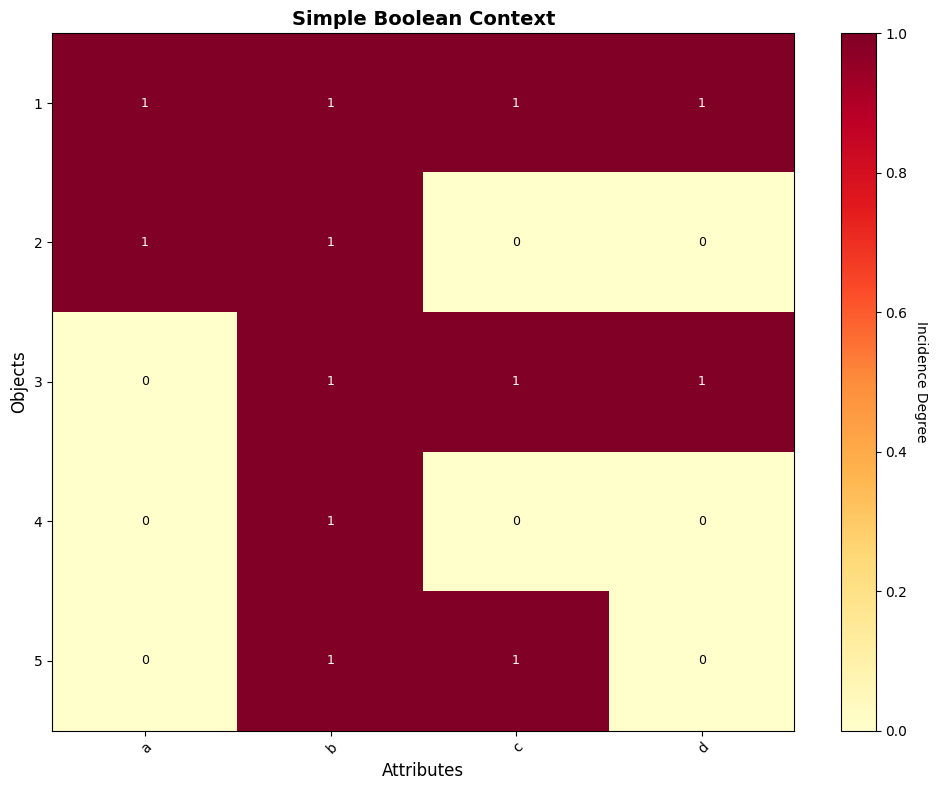

In [3]:
# Visualize the context
fig = plot_context(context, title="Simple Boolean Context")
plt.show()

## Building the Concept Lattice

Now we'll compute all φ-concepts and build the lattice.

In [4]:
# Create Galois connection with pivot φ = 1
galois = GaloisConnection(context, pivot=1)

# Build concept lattice
lattice = ConceptLattice(context, galois, method="canonical")

print(f"Found {len(lattice)} concepts")
print()

# Display all concepts
for i in range(len(lattice.concepts)):
    objs = lattice.get_concept_objects(i)
    attrs = lattice.get_concept_attributes(i)
    print(f"Concept #{i}:")
    print(f"  Extent:  {{{', '.join(objs) if objs else '∅'}}}")
    print(f"  Intent:  {{{', '.join(attrs) if attrs else '∅'}}}")
    print()

Found 5 concepts

Concept #0:
  Extent:  {1, 2, 3, 4, 5}
  Intent:  {b}

Concept #1:
  Extent:  {1}
  Intent:  {a, b, c, d}

Concept #2:
  Extent:  {1, 2}
  Intent:  {a, b}

Concept #3:
  Extent:  {1, 3}
  Intent:  {b, c, d}

Concept #4:
  Extent:  {1, 3, 5}
  Intent:  {b, c}



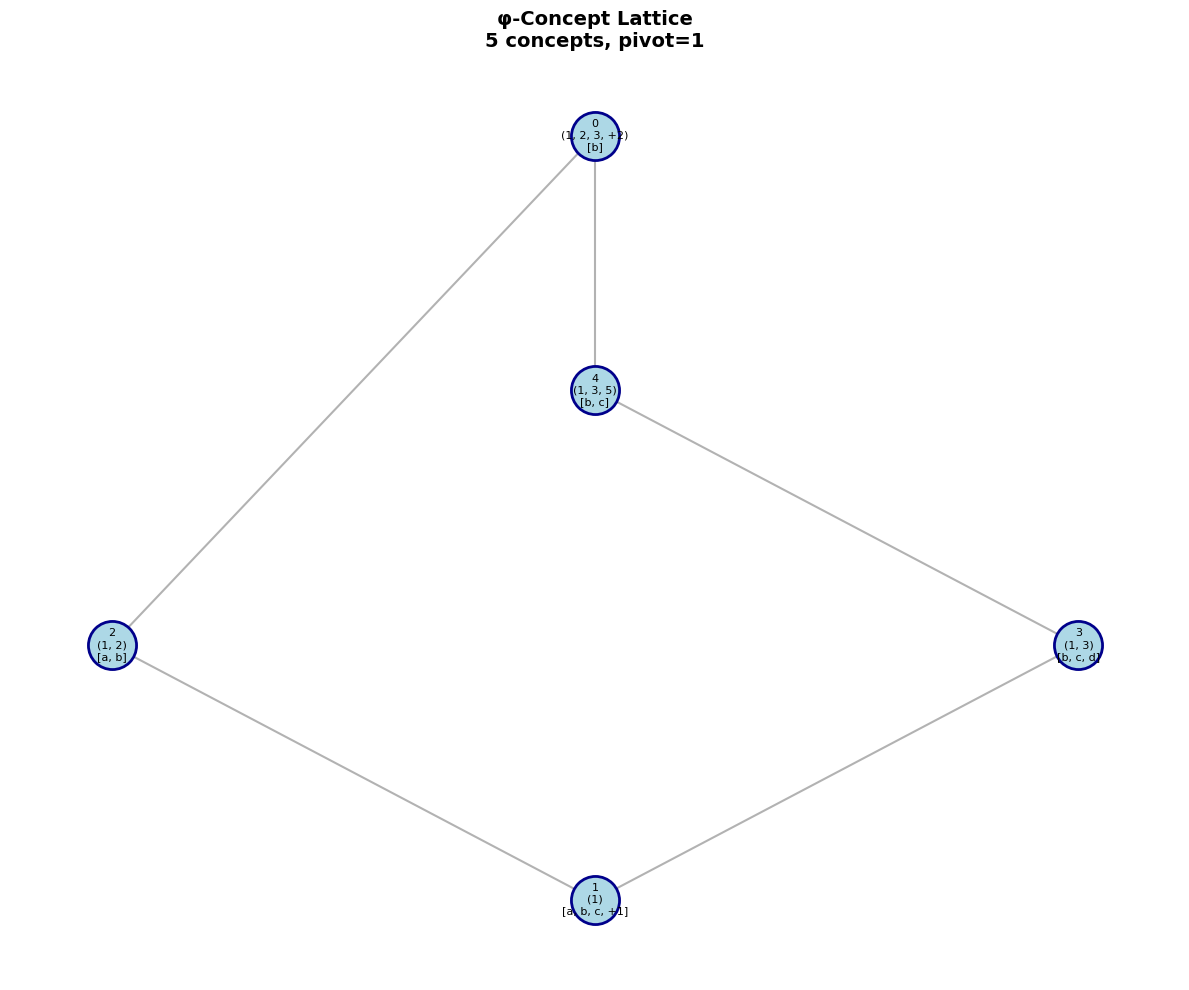

In [5]:
# Visualize the concept lattice
fig = plot_lattice(lattice, layout="hierarchical", figsize=(12, 10))
plt.show()

## Example 2: Computing Individual Concepts

Let's compute the object concept for object "1".

In [6]:
# Create a singleton object set {1}
obj_vec = np.array([1, 0, 0, 0, 0], dtype=object)

# Compute closure
extent = galois.extent_closure(obj_vec)
intent = galois.right_polar(extent)

print("Object concept γ({1}):")
print(f"  Extent: {context.get_objects_subset(extent)}")
print(f"  Intent: {context.get_attributes_subset(intent)}")
print(f"  Is concept: {galois.is_concept(extent, intent)}")

Object concept γ({1}):
  Extent: ['1']
  Intent: ['a', 'b', 'c', 'd']
  Is concept: True


## Example 3: Vehicle Dataset (Continuous Values)

Now let's work with the vehicle dataset that has continuous values.

In [7]:
# Define vehicles and attributes
vehicles = [
    "Car", "Boat", "Scooter", "Motorbike", "Bus",
    "Truck", "Van", "Bicycle", "Helicopter", "Airplane"
]

attrs = [
    "is_transport", "goes_fast", "is_big", "produces_noise",
    "has_2_wheels", "has_4_wheels", "has_motor", "flies",
    "floats", "eco_friendly", "expensive"
]

# Continuous-valued relation (values in [0, 0.25, 0.5, 0.75, 1])
vehicle_relation = np.array([
    [1.00, 1.00, 0.50, 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.25, 0.75],  # Car
    [1.00, 0.50, 0.50, 0.50, 0.00, 0.00, 1.00, 0.00, 1.00, 0.50, 0.75],  # Boat
    [1.00, 0.50, 0.00, 0.50, 1.00, 0.00, 1.00, 0.00, 0.00, 0.50, 0.25],  # Scooter
    [1.00, 0.75, 0.00, 0.75, 1.00, 0.00, 1.00, 0.00, 0.00, 0.25, 0.50],  # Motorbike
    [1.00, 0.50, 1.00, 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.50],  # Bus
    [1.00, 0.50, 1.00, 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.75],  # Truck
    [1.00, 0.50, 0.75, 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.25, 0.75],  # Van
    [1.00, 0.25, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00],  # Bicycle
    [1.00, 0.75, 0.50, 1.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 1.00],  # Helicopter
    [1.00, 1.00, 1.00, 1.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 1.00],  # Airplane
], dtype=object)

# Display the continuous relation
print("Vehicle Dataset (Continuous Values)")
print("="*80)
print(f"Values range: [0, 0.25, 0.5, 0.75, 1.0]")
print()

# Show a sample
for i in range(3):
    print(f"{vehicles[i]:12s}: {vehicle_relation[i][:5]}")

Vehicle Dataset (Continuous Values)
Values range: [0, 0.25, 0.5, 0.75, 1.0]

Car         : [1.0 1.0 0.5 0.75 0.0]
Boat        : [1.0 0.5 0.5 0.5 0.0]
Scooter     : [1.0 0.5 0.0 0.5 1.0]


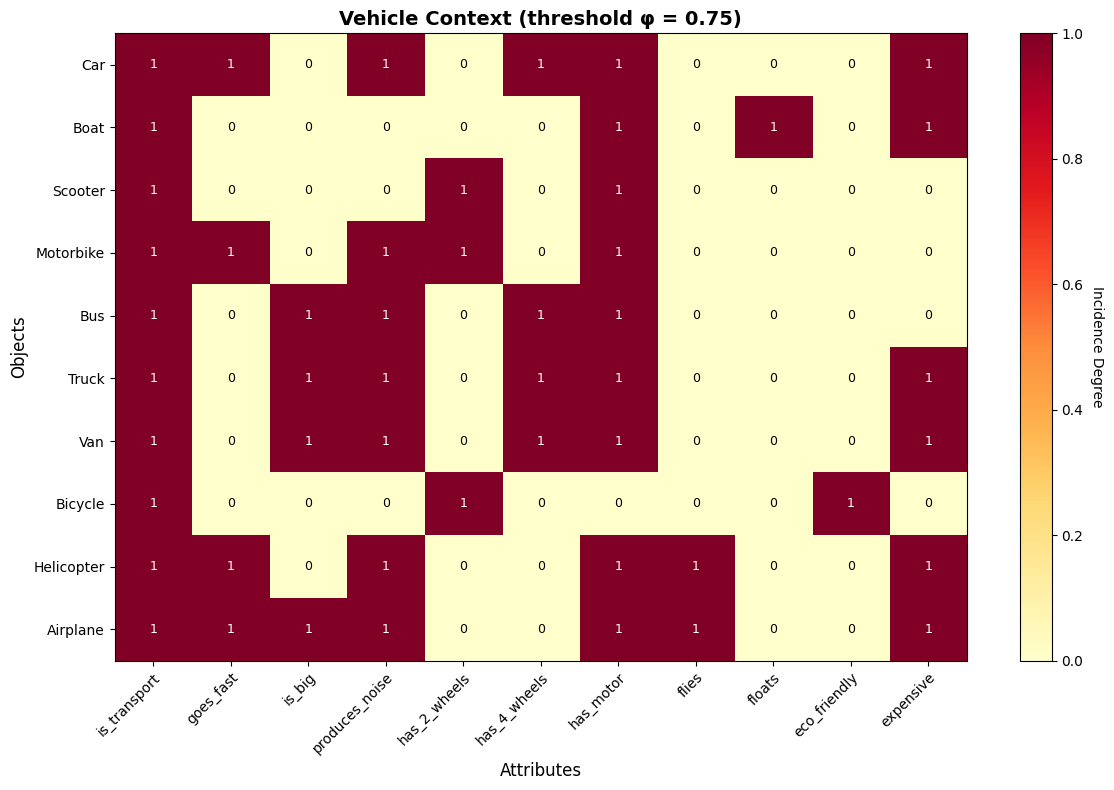

In [ ]:
# Convert to binary using threshold φ = 0.75
threshold = 0.75
binary_relation = (vehicle_relation >= threshold).astype(object).astype(int)

# Create context
vehicle_context = KValuedContext(vehicles, attrs, binary_relation, BooleanSemiring())

# Visualize
fig = plot_context(vehicle_context, figsize=(12, 8), 
                  title=f"Vehicle Context (threshold φ = {threshold})")
plt.show()

In [9]:
vehicle_context

KValuedContext(
  Objects: 10,
  Attributes: 11,
  Semiring: BooleanSemiring(B, ∨, ∧, 0, 1)
)

In [10]:
# Build lattice
vehicle_galois = GaloisConnection(vehicle_context, pivot=1)
vehicle_lattice = ConceptLattice(vehicle_context, vehicle_galois, method="objects")

print(f"Found {len(vehicle_lattice)} concepts with threshold φ = {threshold}")
print()

# Show some interesting concepts
for i in range(min(5, len(vehicle_lattice))):
    objs = vehicle_lattice.get_concept_objects(i)
    attrs_list = vehicle_lattice.get_concept_attributes(i)
    print(f"Concept #{i}:")
    print(f"  Vehicles: {', '.join(objs[:3])}{'...' if len(objs) > 3 else ''}")
    print(f"  Features: {', '.join(attrs_list[:3])}{'...' if len(attrs_list) > 3 else ''}")
    print()

Found 11 concepts with threshold φ = 0.75

Concept #0:
  Vehicles: Car, Boat, Scooter...
  Features: is_transport

Concept #1:
  Vehicles: Car
  Features: is_transport, goes_fast, produces_noise...

Concept #2:
  Vehicles: Boat
  Features: is_transport, has_motor, floats...

Concept #3:
  Vehicles: Scooter, Motorbike
  Features: is_transport, has_2_wheels, has_motor

Concept #4:
  Vehicles: Motorbike
  Features: is_transport, goes_fast, produces_noise...



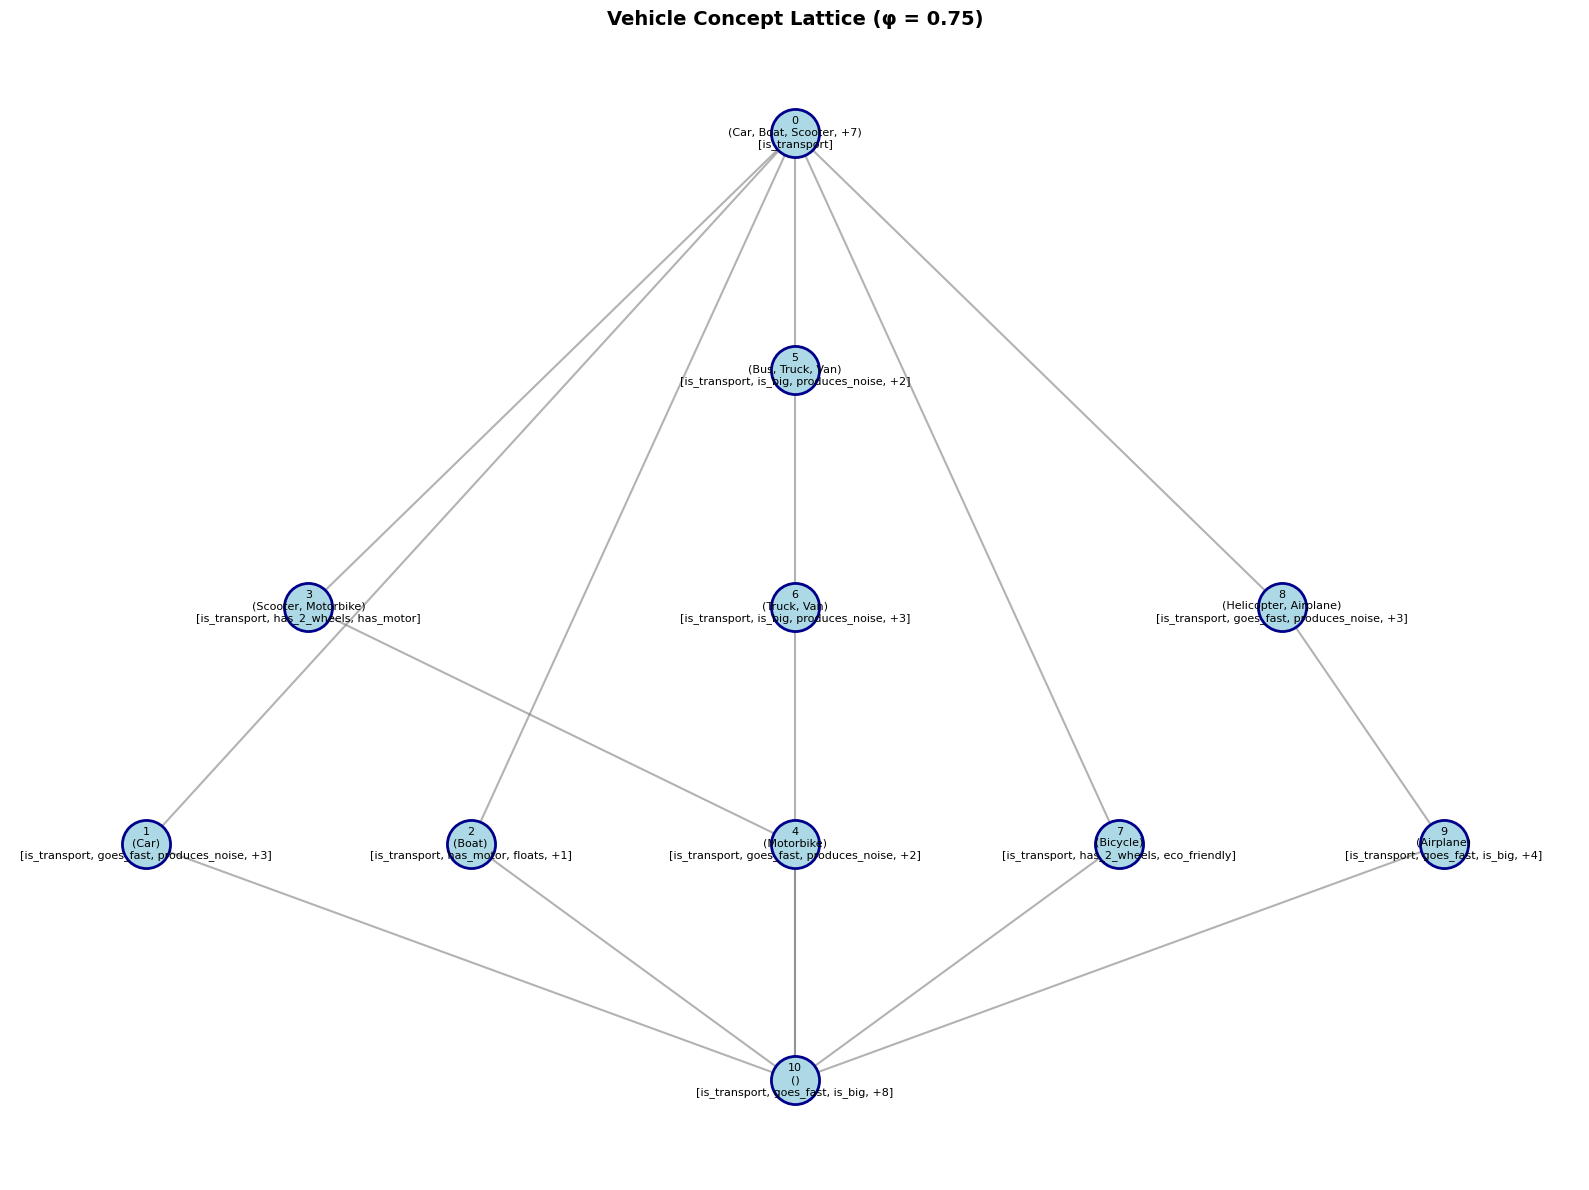

In [11]:
# Visualize the lattice
fig = plot_lattice(vehicle_lattice, figsize=(16, 12), layout="hierarchical",
                  title=f"Vehicle Concept Lattice (φ = {threshold})")
plt.show()

## Exploring Different Thresholds

One of the powerful features of K-FCA is the ability to adjust the pivot φ to get different levels of granularity.

In [12]:
# Compare different thresholds
thresholds = [0.5, 0.75, 1.0]

for threshold in thresholds:
    binary_rel = (vehicle_relation >= threshold).astype(object).astype(int)
    ctx = KValuedContext(vehicles, attrs, binary_rel, BooleanSemiring())
    gal = GaloisConnection(ctx, pivot=1)
    lat = ConceptLattice(ctx, gal, method="objects")
    
    print(f"φ = {threshold}: {len(lat)} concepts")

φ = 0.5: 8 concepts
φ = 0.75: 11 concepts
φ = 1.0: 10 concepts


## Key Observations

1. **Lower threshold** (φ = 0.5) → More attributes qualify → Fewer, larger concepts
2. **Higher threshold** (φ = 1.0) → Fewer attributes qualify → More, smaller concepts
3. **Standard FCA** is K-FCA with Boolean semiring and φ = 1

## Next Steps

Try experimenting with:
- Different semirings (Max-Plus, Min-Plus)
- Your own datasets
- Different pivot values
- Custom semiring implementations